In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


# EDA: Let's explore our data !

In [3]:
df_control=pd.read_csv('/kaggle/input/ab-testing-dataset/control_group.csv', sep=";")

In [4]:
df_control

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [5]:
df_control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [6]:
df_test=pd.read_csv('/kaggle/input/ab-testing-dataset/test_group.csv', sep=";")

In [7]:
df_test

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [8]:
df_test.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [9]:
df_control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [10]:
df_test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [11]:

df_control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

**Data Cleanning :**
We have some null values in the control group; let's replace them with the mean of the column.

In [12]:
df_control['# of Impressions'].fillna(df_control['# of Impressions'].mean(), inplace=True)
df_control['Reach'].fillna(df_control['Reach'].mean(), inplace=True)
df_control['# of Website Clicks'].fillna(df_control['# of Website Clicks'].mean(), inplace=True)
df_control['# of Searches'].fillna(df_control['# of Searches'].mean(), inplace=True)
df_control['# of View Content'].fillna(df_control['# of View Content'].mean(), inplace=True)
df_control['# of Add to Cart'].fillna(df_control['# of Add to Cart'].mean(), inplace=True)
df_control['# of Purchase'].fillna(df_control['# of Purchase'].mean(), inplace=True)

/tmp/ipykernel_33/3293306453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_control['# of Impressions'].fillna(df_control['# of Impressions'].mean(), inplace=True)
/tmp/ipykernel_33/3293306453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

**Let's check again :**

In [13]:
df_control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

Cool :) Now let's keep exploring

In [14]:
df_test.info()
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   D

In [15]:
df_control.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [16]:
df_test.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


# Graphs to visualize the data

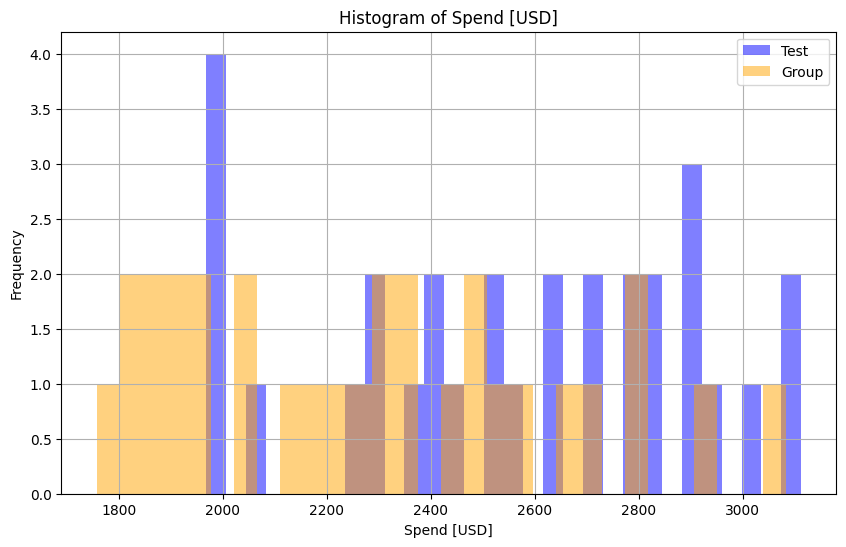

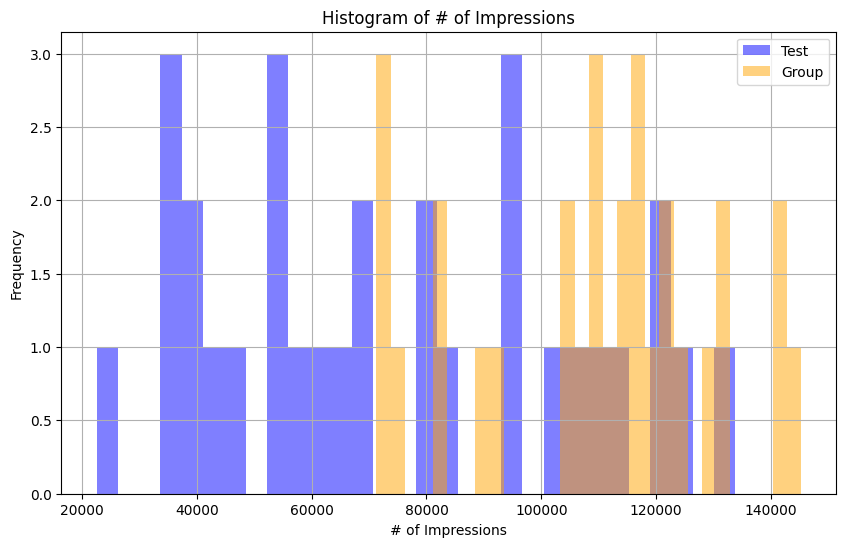

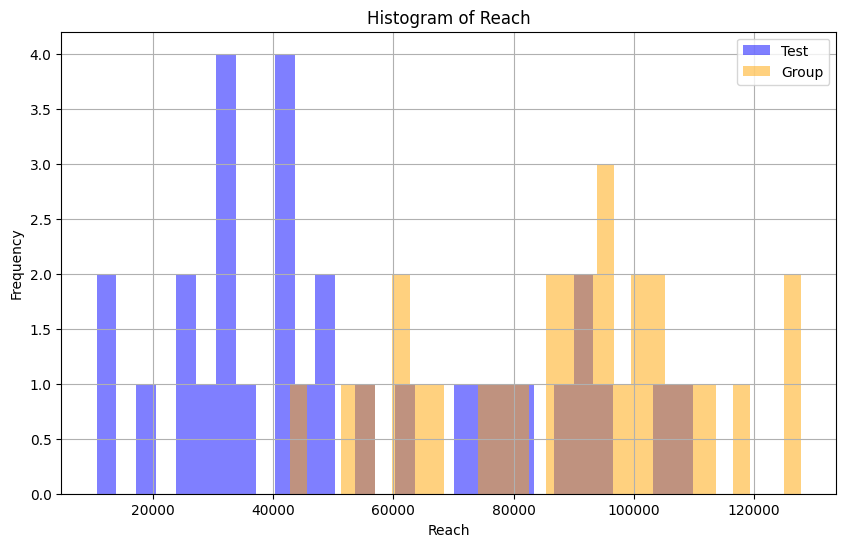

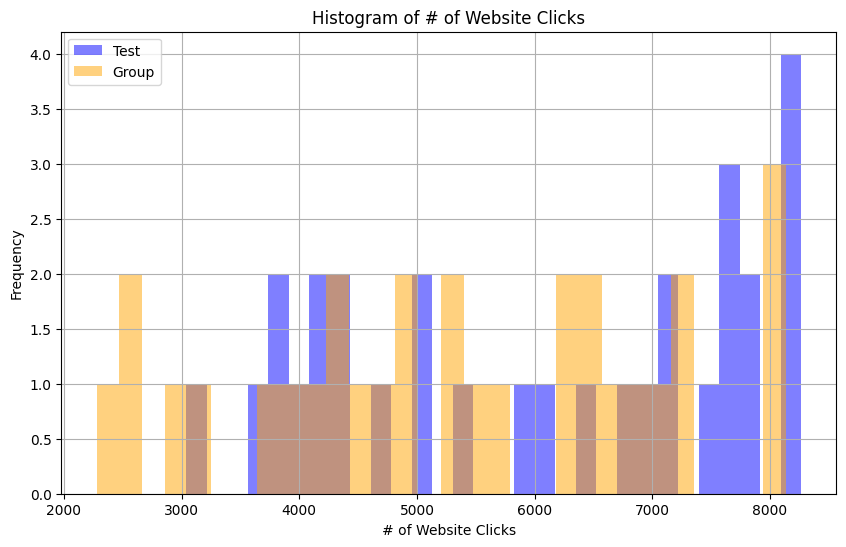

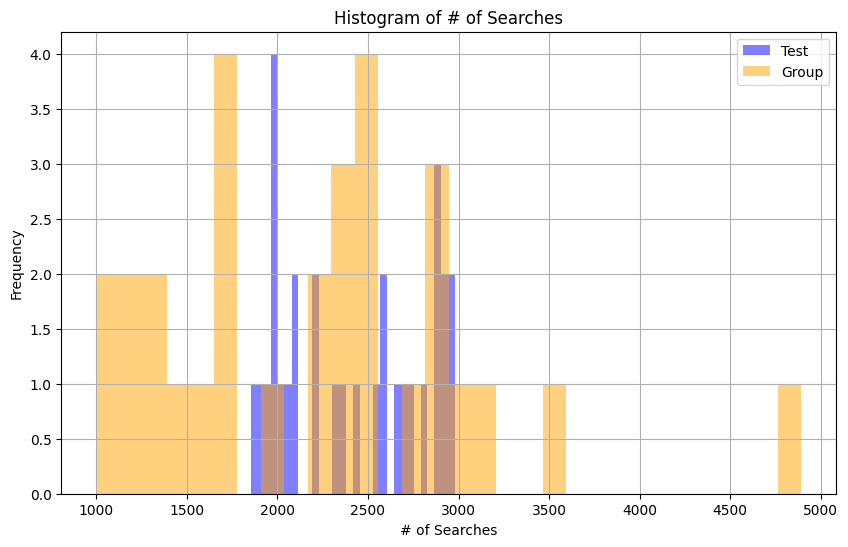

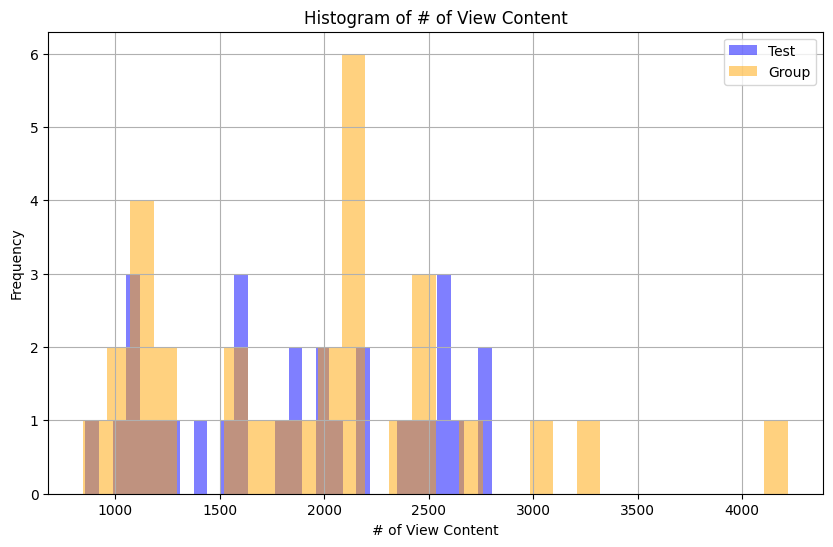

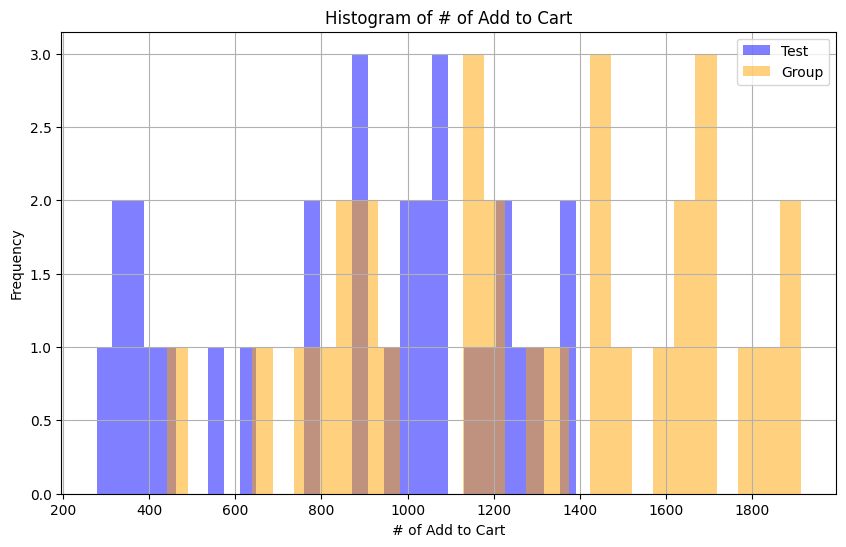

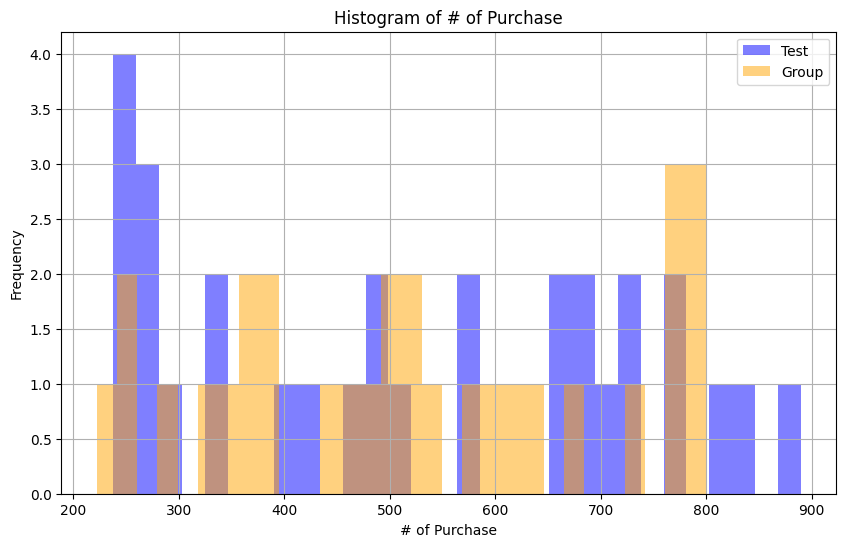

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
                  '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Création des histogrammes
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    df_test[col].hist(bins=30, alpha=0.5, label='Test', color='blue')
    df_control[col].hist(bins=30, alpha=0.5, label='Group', color='orange')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


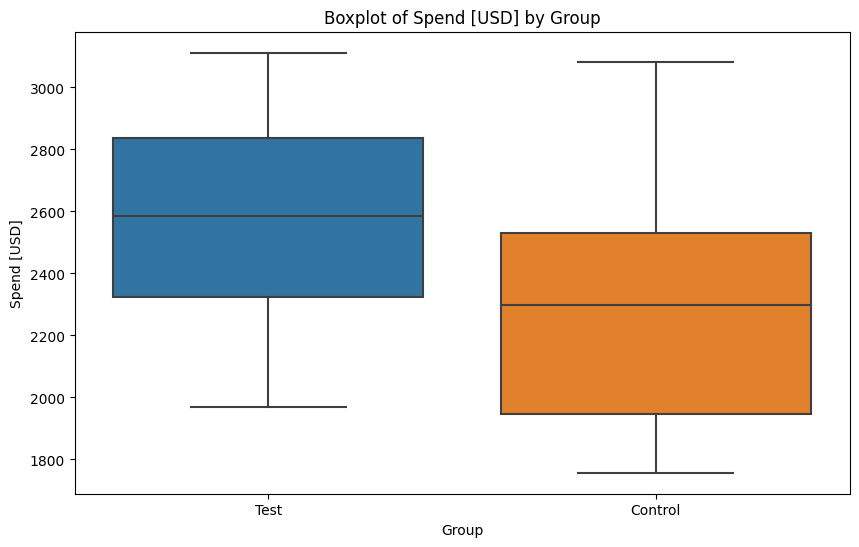

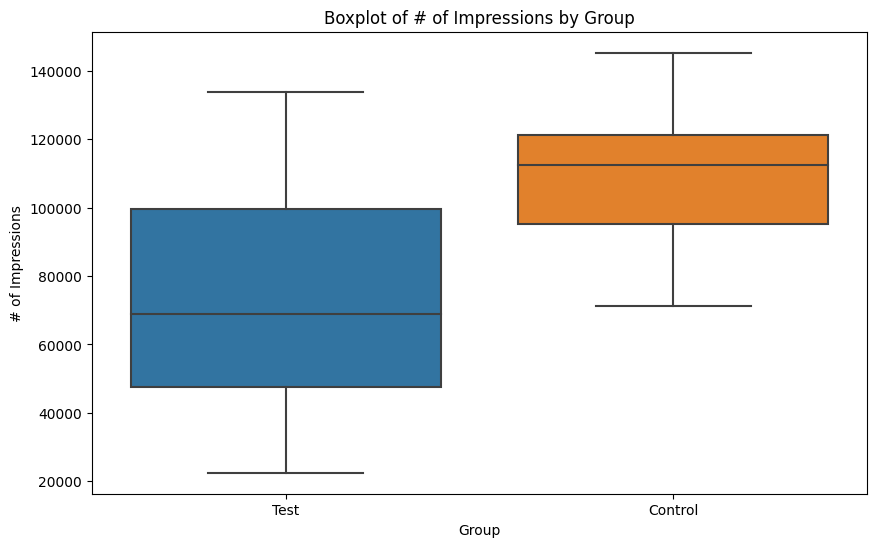

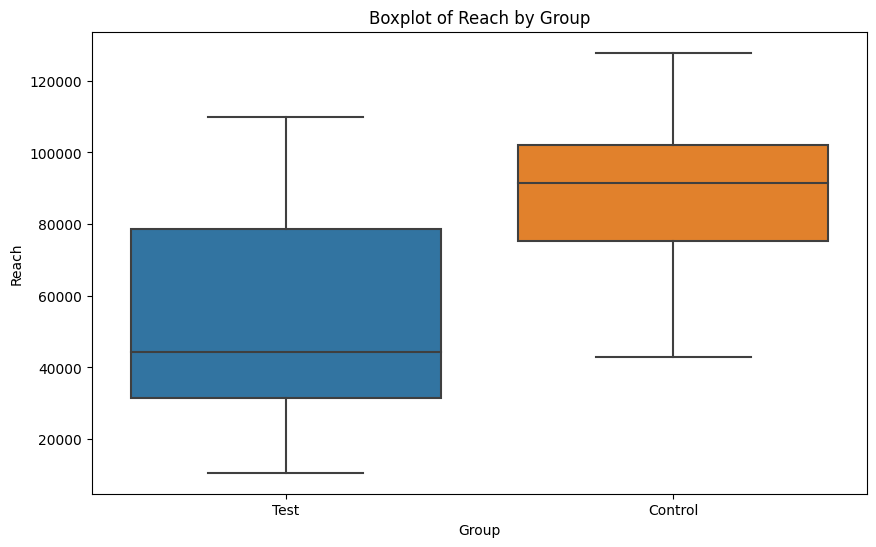

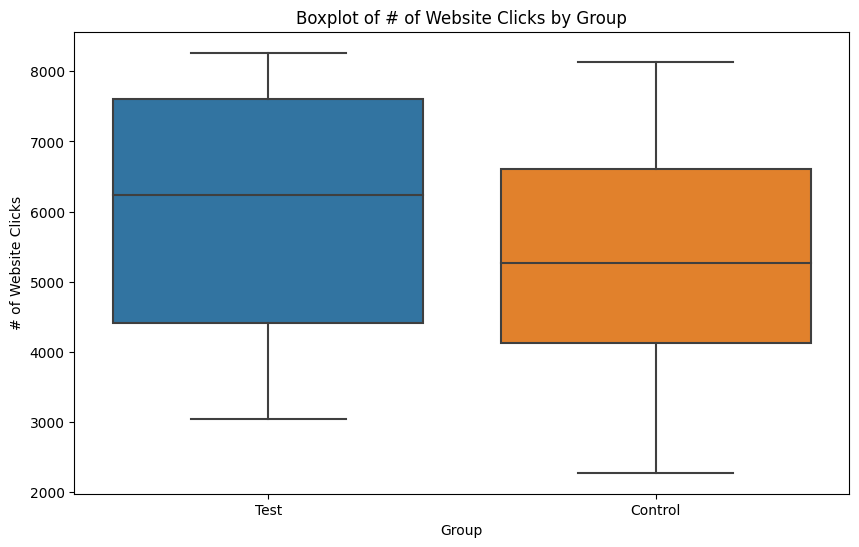

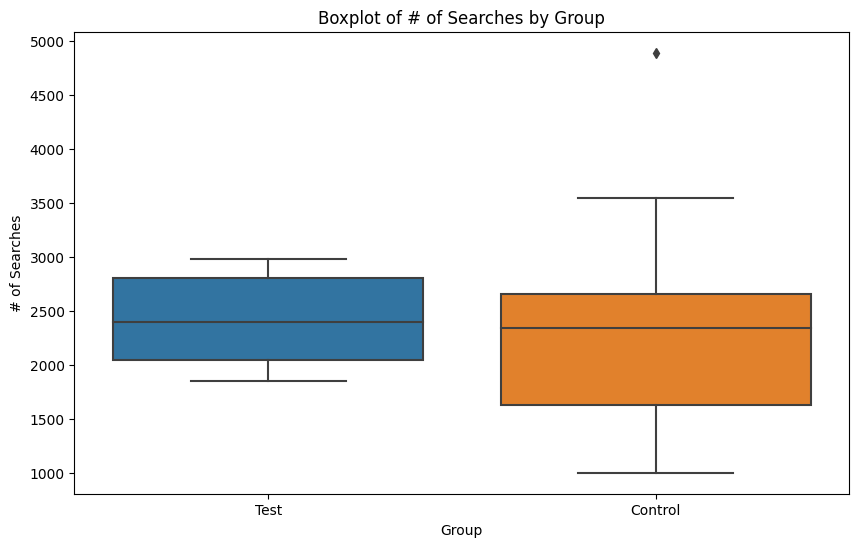

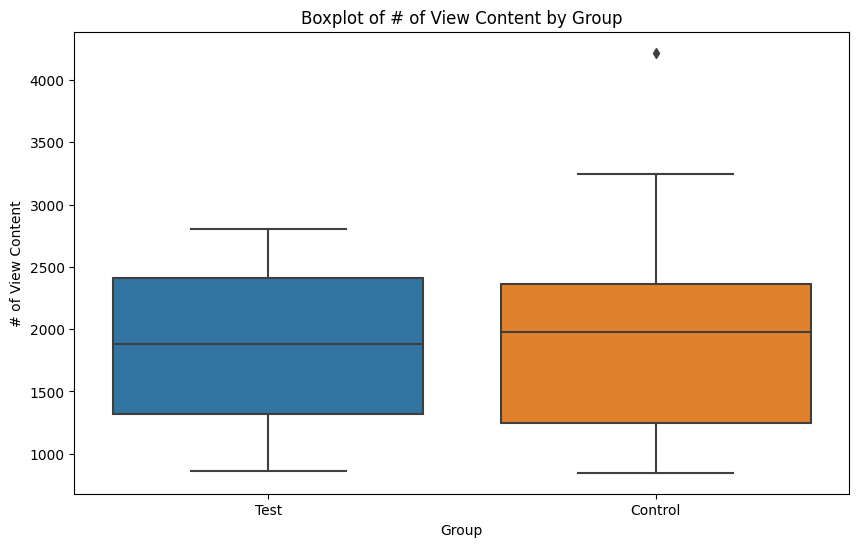

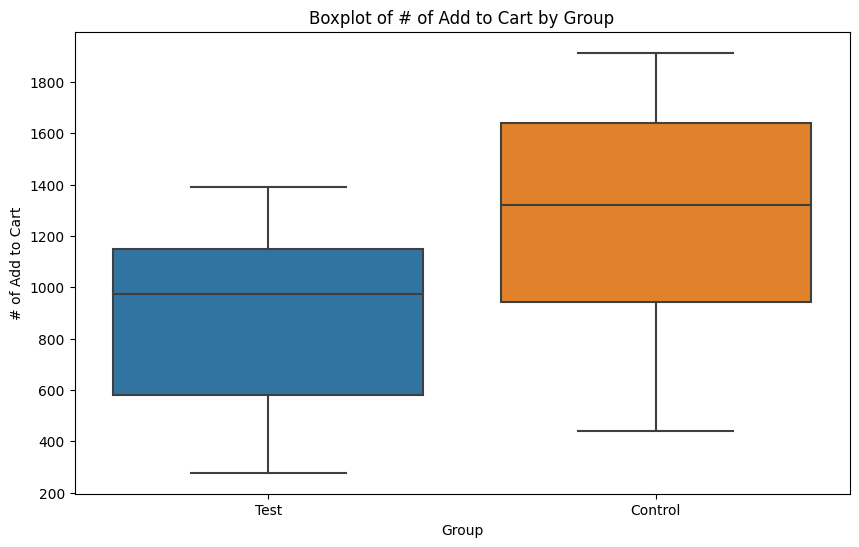

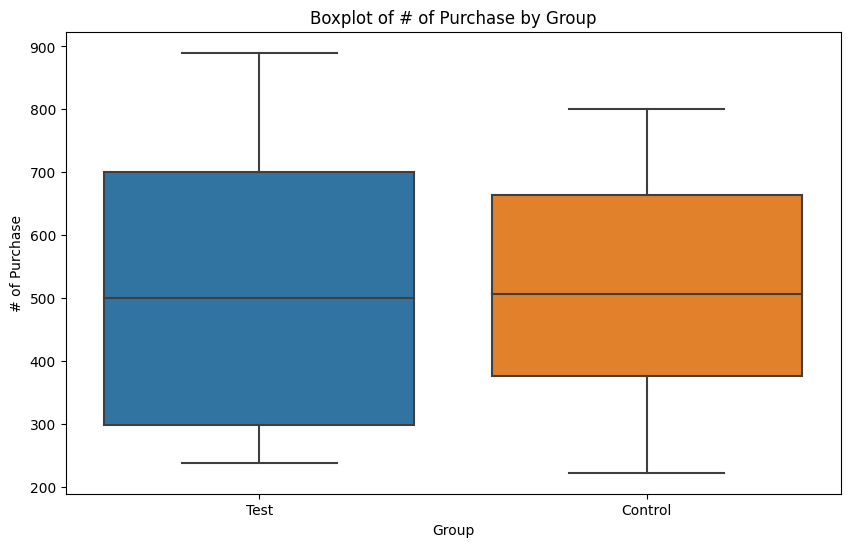

In [18]:
import seaborn as sns

# Ajouter une colonne pour identifier les groupes
df_test['Group'] = 'Test'
df_control['Group'] = 'Control'

# Combiner les deux DataFrames
df_combined = pd.concat([df_test, df_control])

# Création des boxplots pour comparer les deux groupes
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=col, data=df_combined)
    plt.title(f'Boxplot of {col} by Group')
    plt.show()

# Interpretation of the Boxplot Comparing the Number of Searches (# of Searches) Between Test and Control Groups:

**Median**

The median of the Test group is slightly lower than that of the Control group. The median is the horizontal line in the middle of each box.
    Test: Median ≈ 2400.
    Control: Median ≈ 2350.

**Quartiles and Interquartile Range (IQR)**

The box represents the interquartile range (IQR), which goes from the first quartile (Q1, lower edge of the box) to the third quartile (Q3, upper edge of the box).
    Test:
        Q1 ≈ 2100.
        Q3 ≈ 2800.
    Control:
        Q1 ≈ 2000.
        Q3 ≈ 3000.

**Range of the Data (Whiskers)**

The "whiskers" show the range of the non-outlier data.
    Test: Ranges from ≈ 1700 to ≈ 3100.
    Control: Ranges from ≈ 1500 to ≈ 3500.

**Outliers**

There is an outlier in the Control group above 4500, indicated by an isolated point. This means there is an exceptionally high observation in the Control group compared to the overall distribution of the data.

**Data Spread**

The Control group shows a greater spread of the data compared to the Test group.
    IQR for Test: 2800 - 2100 = 700.
    IQR for Control: 3000 - 2000 = 1000.
    The total spread (from the lower whisker to the upper whisker) is also larger for the Control group.

**Conclusion**

**Central Tendency:** The median number of searches is slightly higher for the Control group compared to the Test group, indicating a slightly higher central tendency in the Control group.
**Dispersion:** The dispersion of searches is greater in the Control group, meaning the searches are more varied in this group. This is indicated by a larger IQR and a wider overall range.
**Outliers:** There is a significant outlier in the Control group, suggesting one or more exceptionally high searches in this group.



In [19]:
df_control

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,Control
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,Control
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,Control
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,Control
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,Control
5,Control Campaign,6.08.2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000,Control
6,Control Campaign,7.08.2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000,Control
7,Control Campaign,8.08.2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000,Control
8,Control Campaign,9.08.2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000,Control
9,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000,Control


# **Merge data**

# Chart pies

7


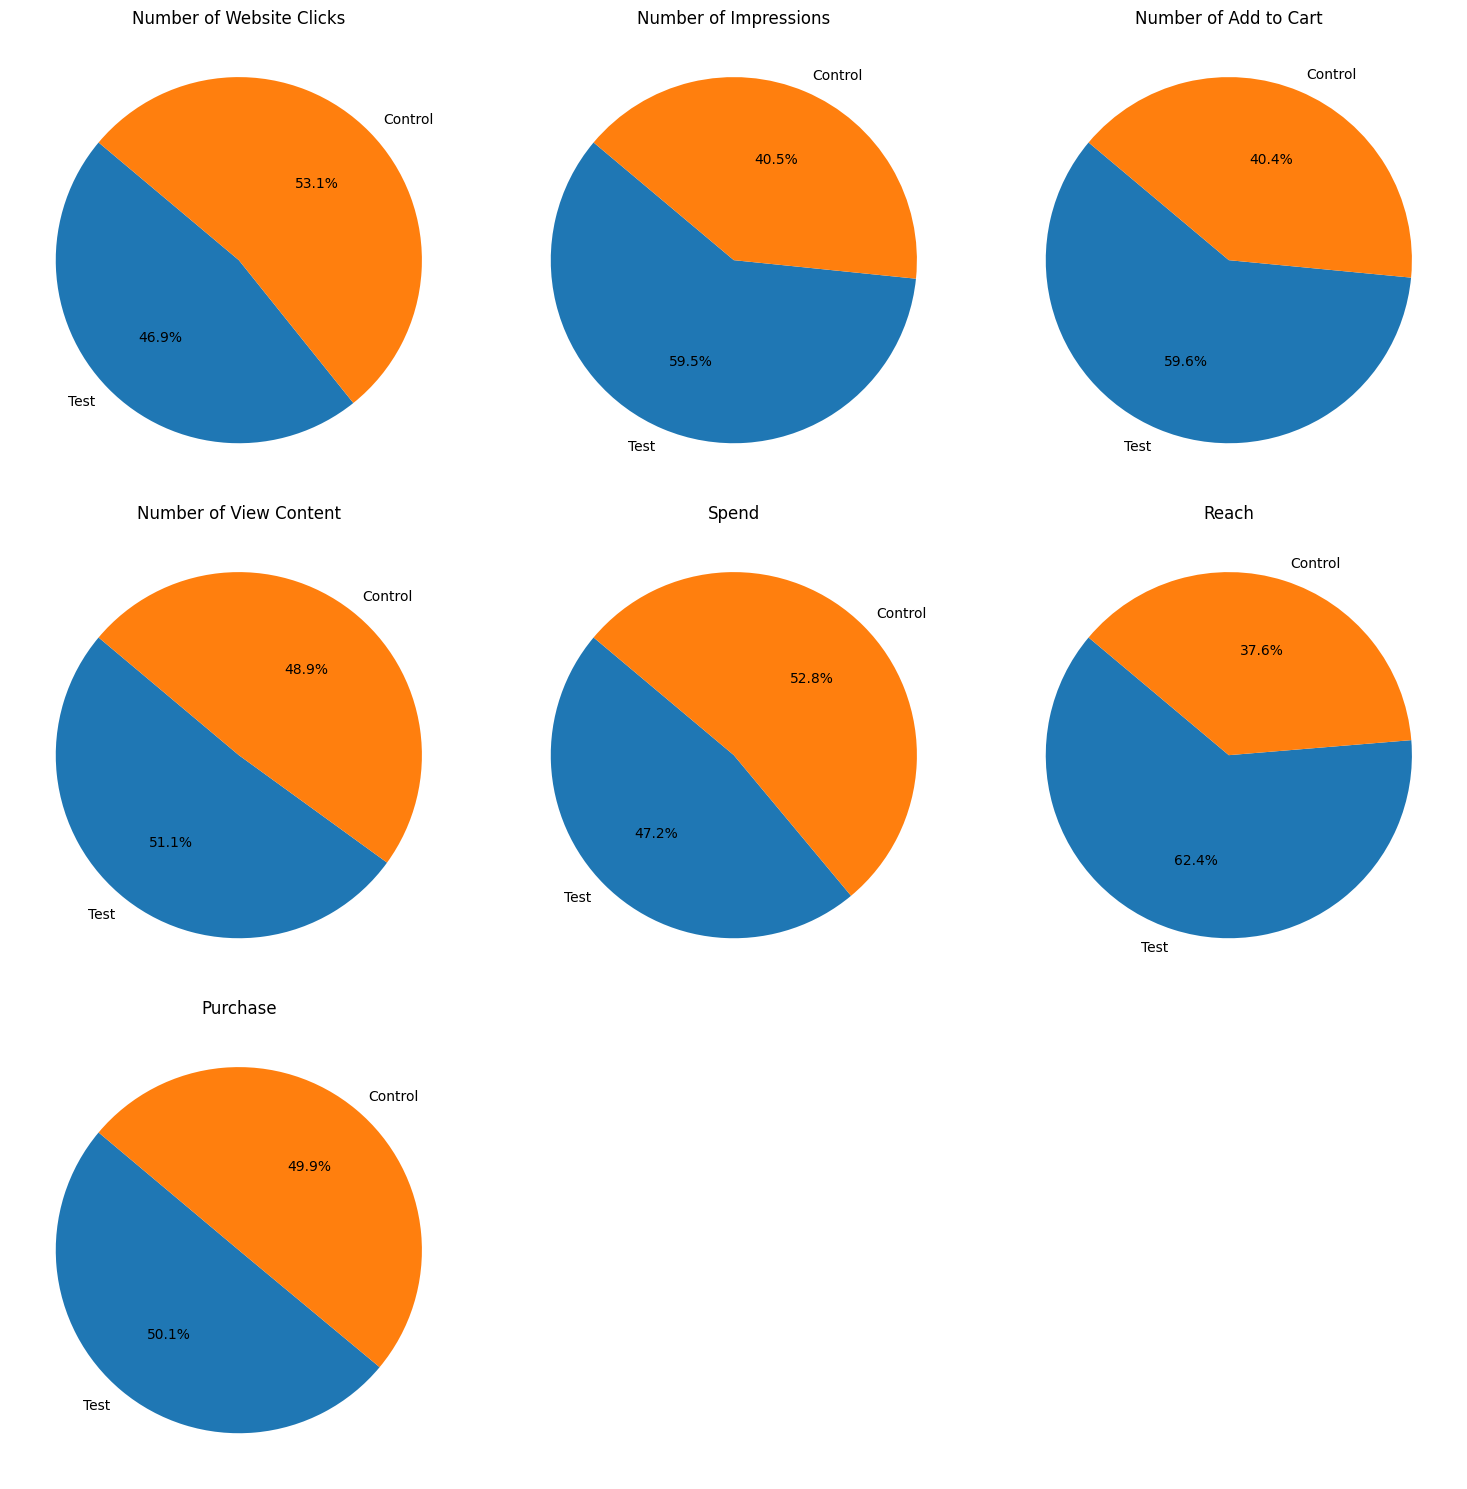

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 2 rows, 3 columns
fig.delaxes(axs[2][2])
fig.delaxes(axs[2][1])
# Titles for each pie chart
titles = [
    'Number of Website Clicks', 'Number of Impressions', 'Number of Add to Cart','Number of View Content',
    'Spend', 'Reach', 'Purchase'
]
values= [sum(df_control["# of Impressions"]),sum(df_test["# of Impressions"])]
values1= [sum(df_control["# of Website Clicks"]),sum(df_test["# of Website Clicks"])]
values2= [sum(df_control["# of View Content"]),sum(df_test["# of View Content"])]
values3= [sum(df_control["# of Add to Cart"]),sum(df_test["# of Add to Cart"])]
values4= [sum(df_control["Spend [USD]"]),sum(df_test["Spend [USD]"])]
values5= [sum(df_control["Reach"]),sum(df_test["Reach"])]
values6= [sum(df_control["# of Purchase"]),sum(df_test["# of Purchase"])]
data=[values1, values,values3, values2,values4,values5,values6]
print(len(data))
# Create each pie chart
for i, ax in enumerate(axs.flat):
    #ax.pie(values, labels=labels, autopct='%1.1f%%')
    #ax.set_title(titles[i])
    if i < len(data):  # Check to avoid plotting empty subplot
        ax.pie(data[i], labels=labels, autopct='%1.1f%%', startangle=140)
        ax.set_title(titles[i])
    else:
        ax.axis('off')  # Hide unused subplot


# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()





# A/B Test 
# Purchase 
## 1. Check Normality


Formulating a Hypothesis¶

    H0 : Normal Distribution provided
    H1 : Normal Distribution not provided


We suppose the alpha level is 0.05

**Shapiro-Wilk Test**

In [22]:
from scipy.stats import  shapiro

In [23]:
test_stat, pvalue = shapiro(df_control["# of Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_test["# of Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9433, p-value = 0.1114
Test Stat = 0.9182, p-value = 0.0241


     p-value of df_control is > 0.05 H0 cannot be rejected
      
      p-value of df_test is < 0.05 H0 Can be rejected
  
  Conclusion:

    df_control (# of Purchase) is normally distributed.
    df_test (# of Purchase) is not normally distributed.

Next Steps:

Since the data has different normality properties, we should consider using non-parametric tests, which do not assume normal distribution, to compare the two groups.
Statistical Tests to Consider:

    Mann-Whitney U Test:
        This is a non-parametric test used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

    Two-Sample t-Test:
        If you want to proceed with a parametric test despite the normality issue, you could apply a transformation (like a log transformation) to make the df_test data more normally distributed. Then, you can use the two-sample t-test to compare the means of the two groups.

    Permutation Tests:
        These are non-parametric tests that do not rely on any distributional assumptions and can be used to compare the two groups.

## 2. Non parametric Method
**Mann- Whitney U Test**

Formulating a Hypothesis¶

    H0 : he distributions of the two groups are identical. In other words, the probability that a randomly selected value from one group is less than a randomly selected value from the other group is equal to 0.5. 


    H1 : he distributions of the two groups are not identical. This means that one group tends to have higher or lower values compared to the other group.

In [24]:
import scipy.stats as stats


control_purchases = df_control["# of Purchase"]
test_purchases = df_test["# of Purchase"]

# Perform Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(control_purchases, test_purchases)

print(f"Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The distributions of the two groups are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.")


Mann-Whitney U statistic: 455.0
P-value: 0.9469515266277105
Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.


**Conclusion**
No Significant Difference: The test indicates that the promotional or experimental intervention (if any) applied to the Test group did not lead to a statistically significant difference in the number of purchases compared to the Control group.

Let's ssee other variables: 
For example, Number of website clicks and conversion rate


# # of Website Clicks

## 1. check normality

In [25]:
test_stat, pvalue = shapiro(df_control["# of Website Clicks"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_test["# of Website Clicks"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9632, p-value = 0.3731
Test Stat = 0.9062, p-value = 0.0120


## 2. Non parametric Method

In [26]:

# Perform Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(df_control["# of Website Clicks"], df_test["# of Website Clicks"])

print(f"Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The distributions of the two groups are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.")

Mann-Whitney U statistic: 349.0
P-value: 0.13732283484699295
Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.


**Conclusion**
No Significant Difference: The test indicates that the promotional or experimental intervention (if any) applied to the Test group did not lead to a statistically significant difference in the number of website clicks compared to the Control group.

# Number of Impression

## 1. Check Normality 

In [27]:
test_stat, pvalue = shapiro(df_control["# of Impressions"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_test["# of Impressions"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9437, p-value = 0.1145
Test Stat = 0.9485, p-value = 0.1537


Null Hypothesis (H₀): This is a general statement or default position that there is no effect or no difference. In our case, the marketig strategy has no effect.

Alternative Hypothesis (H₁): This is what you want to prove. It is the opposite of the null hypothesis. the alternative hypothesis would be that the marketing strategy does have an effect.

    H0 : there is no statistically difference in the sample distribution and the normal distribution
    H1 : There is a statistivally difference between th sample distribution and the norlam distribution.

p_values are both > 0.05 o we can not rejct H0 ! 

## 2. Parametric method : Independent Samples t Test for Impression 

**When performing a t-test, it is important to consider the variance of the two groups being compared because the choice of the specific 
type of t-test depends on whether the variances of the two groups are equal or not.**
**Variance is a measure of the spread of the data points in a dataset. If the variances are unequal, it affects the assumption of the t-test 
and can lead to incorrect conclusions.**
Types of t-tests:

    Independent Two-Sample t-test (Equal Variances):
        Assumes that the two groups have equal variances.
        This is also known as the Students t-test.
        Use this test when you are confident that the variances of the two groups are similar.

    Welch's t-test (Unequal Variances):
        Does not assume that the variances of the two groups are equal.
        More robust and reliable when the assumption of equal variances is violated.
        This test is preferred when there is a significant difference in the variances between the groups.

# 3. check variance with **Levene's Test** 

    H0 : The variance are equal across groups
    H1 : The variance are not equal across groups

t-test hypothesis : 
    
    H0 : There is no significant difference between the groups
    H1: There is a significant difference.

In [44]:

levene_statistic, levene_p_value = stats.levene(df_control["# of Impressions"],df_test["# of Impressions"])

print(f"Levene's test statistic: {levene_statistic}")
print(f"P-value: {levene_p_value}")

if levene_p_value < 0.05:
    print("Reject the null hypothesis: The variances of the two groups are different.")
    equal_var = False
else:
    print("Fail to reject the null hypothesis: The variances of the two groups are not significantly different.")
    equal_var = True

# Perform t-test based on the result of Levene's test
t_statistic, t_p_value = stats.ttest_ind(df_control["# of Impressions"],df_test["# of Impressions"], equal_var=equal_var)

print(f"T-test statistic: {t_statistic}")
print(f"P-value: {t_p_value:.5f}")

if t_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between control group and test group in Impression values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between control group and test group in Impression values")

Levene's test statistic: 7.754060233281115
P-value: 0.007225907712495474
Reject the null hypothesis: The variances of the two groups are different.
T-test statistic: 4.969499291621205
P-value: 0.00001
Reject the null hypothesis: There is a significant difference between control group and test group in Impression values.


**Conclusion**
Significant Difference: The test indicates that the promotional or experimental intervention (if any) applied to the Test group did not lead to a statistically significant difference in the number of impressions compared to the Control group.

# Conversion rate

**A conversion rate is the percentage of users who take a desired action out of the total number of users who were exposed to the opportunity to do so. It is a key metric in marketing and business that measures the effectiveness of a campaign or strategy.**

## 1. Calculate converion rate 

In [28]:
#Feature Engineering: Conversion Rate
df_control["Conversion Rate"] = df_control["# of Purchase"]/df_control["# of Website Clicks"]*100
df_test["Conversion Rate"] = df_test["# of Purchase"]/df_test["# of Website Clicks"]*100


In [29]:
df_control["Conversion Rate"].mean()

11.422145561109405

In [30]:
df_test["Conversion Rate"].mean()

9.2311817032836

## 2. Check Normality

In [31]:
test_stat, pvalue = shapiro(df_control["Conversion Rate"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_test["Conversion Rate"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 0.8930, p-value = 0.0057
Test Stat = 0.9255, p-value = 0.0373


p_value <0.05 so we reject H0; the normality assumption is not provided !

## 3. Non parametric Method

In [32]:
# Perform Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(df_control["Conversion Rate"], df_test["Conversion Rate"])

print(f"Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The distributions of the two groups are different.")
else:
    print("Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.")

Mann-Whitney U statistic: 523.0
P-value: 0.2837780479456242
Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.


**Conclusion:** No Significant Difference: The test indicates that the intervention or change applied to the Test group did not lead to a statistically significant difference in conversion rates compared to the Control group.

**Review Strategy:** If we expected the Test group to perform differently, we may need to review and possibly adjust the strategy or consider other factors that might influence conversion rates.